In [7]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import import_ipynb
from utils import ImageToArrayPreprocessor, SimplePreprocessor, SimpleDatasetLoader
from ShallowNet import ShallowNet

importing Jupyter notebook from ShallowNet.ipynb


In [8]:
args = {
    "dataset":"/home/vinayak/Desktop/PyImageSearch/DL4CV/dogs-v-cats/animals/animals/"
}
print("[INFO] loading images")
imagePaths = list(paths.list_images(args["dataset"]))

[INFO] loading images


In [9]:
sp = SimplePreprocessor(32,32)
iap = ImageToArrayPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float")/255.0

[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


In [10]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, 
                                                  test_size=0.25, random_state=42)
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [11]:
opt = print("[INFO] compiling model")
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.005),
             metrics=["accuracy"])
print("[INFO] training network")
H = model.fit(trainX, trainY, validation_data=(testX, testY), 
             batch_size=32, epochs=100, verbose=1)

[INFO] compiling model
[INFO] training network
Epoch 1/100
71/71 [==============================] - 1s 12ms/step - loss: 1.0174 - accuracy: 0.4671 - val_loss: 0.9992 - val_accuracy: 0.5053
Epoch 2/100
71/71 [==============================] - 1s 10ms/step - loss: 0.9091 - accuracy: 0.5516 - val_loss: 1.0236 - val_accuracy: 0.5253
Epoch 3/100
71/71 [==============================] - 1s 10ms/step - loss: 0.8791 - accuracy: 0.5618 - val_loss: 0.9123 - val_accuracy: 0.5387
Epoch 4/100
71/71 [==============================] - 1s 10ms/step - loss: 0.8523 - accuracy: 0.5884 - val_loss: 0.8872 - val_accuracy: 0.5480
Epoch 5/100
71/71 [==============================] - 1s 10ms/step - loss: 0.8383 - accuracy: 0.5871 - val_loss: 0.9153 - val_accuracy: 0.5347
Epoch 6/100
71/71 [==============================] - 1s 10ms/step - loss: 0.8159 - accuracy: 0.5916 - val_loss: 0.8642 - val_accuracy: 0.5667
Epoch 7/100
71/71 [==============================] - 1s 11ms/step - loss: 0.8100 - accuracy: 0.6062 -

71/71 [==============================] - 1s 13ms/step - loss: 0.4876 - accuracy: 0.8067 - val_loss: 0.7780 - val_accuracy: 0.6760
Epoch 59/100
71/71 [==============================] - 1s 10ms/step - loss: 0.4829 - accuracy: 0.8049 - val_loss: 0.8143 - val_accuracy: 0.6293
Epoch 60/100
71/71 [==============================] - 1s 10ms/step - loss: 0.4803 - accuracy: 0.8058 - val_loss: 0.7491 - val_accuracy: 0.6787
Epoch 61/100
71/71 [==============================] - 1s 10ms/step - loss: 0.4705 - accuracy: 0.8169 - val_loss: 0.7695 - val_accuracy: 0.6547
Epoch 62/100
71/71 [==============================] - 1s 10ms/step - loss: 0.4694 - accuracy: 0.8080 - val_loss: 0.7869 - val_accuracy: 0.6507
Epoch 63/100
71/71 [==============================] - 1s 10ms/step - loss: 0.4685 - accuracy: 0.8116 - val_loss: 0.8923 - val_accuracy: 0.5867
Epoch 64/100
71/71 [==============================] - 1s 10ms/step - loss: 0.4638 - accuracy: 0.8164 - val_loss: 0.7509 - val_accuracy: 0.6773
Epoch 65/100

In [12]:
print("INFO evaluating network")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
                           predictions.argmax(axis=1),
                           target_names=["cat","dog","panda"]))

INFO evaluating network
              precision    recall  f1-score   support

         cat       0.59      0.76      0.66       249
         dog       0.65      0.58      0.61       262
       panda       0.87      0.72      0.78       239

    accuracy                           0.68       750
   macro avg       0.70      0.68      0.69       750
weighted avg       0.70      0.68      0.68       750



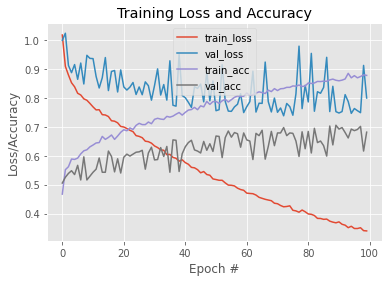

In [13]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()